# PIK3CA: Effects of Mutation on IRS2

<b> Standard imports for playing with and plotting data frames. </b>

In [54]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

<b> Import CPTAC data </b>

In [55]:
import CPTAC

In [56]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and IRS2 proteome abundance (with control)

### Perform a t-test with mutated and non-mutated protein levels

In [57]:
protList = ['IRS2']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for IRS2: 
Ttest_indResult(statistic=-4.172569544762063, pvalue=5.7556845433808284e-05)


 ### We can now plot the data 

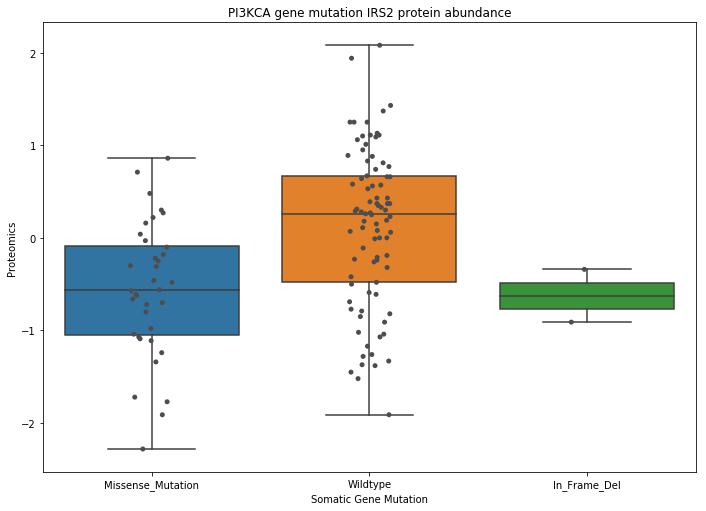

In [58]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='IRS2', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation IRS2 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='IRS2',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and IRS2 proteome abundance (no control)

<b> Take out the control </b>

In [59]:
proteomics = proteomics[:100]

### Perform a t-test with mutated and non-mutated protein levels

In [60]:
protList = ['IRS2']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 
        else:
            print("Unsignificant result for " + protein + ": ")
            print(ttest) 
            

Unsignificant result for IRS2: 
Ttest_indResult(statistic=-1.898442533077942, pvalue=0.06103116403270328)


 ### We can now plot the data 

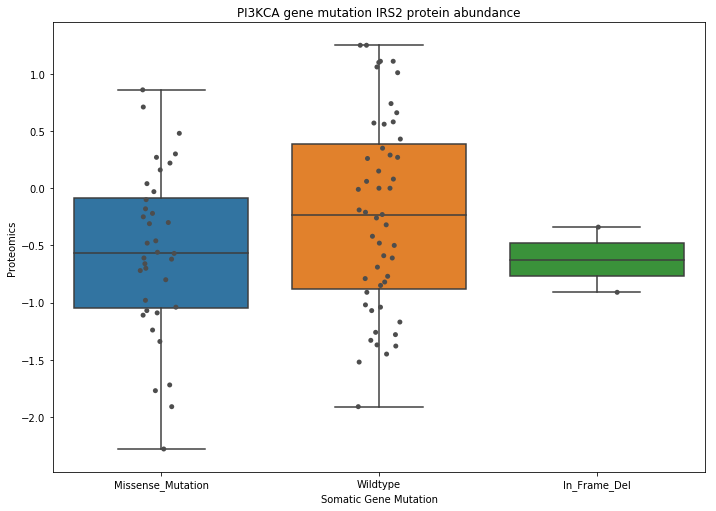

In [61]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='IRS2', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation IRS2 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='IRS2',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and IRS2 phosphoproteome abundance 

In [62]:
sites = phos.columns
p_values = []
site_names = []
protein = 'IRS2'


pattern = re.compile(protein)
isInList = filter(pattern.search, sites)
if next(isInList, None) is not None:
    phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
    phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    for site in phosphositesdf.columns:
        if (site is not 'Mutation'):
            sitedf = CPTAC.compare_mutations(phos, site, gene)
            mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
            wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
            ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
            p_values.append(ttest[1])
            site_names.append(site)     
                
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

significant_vals = dict(zip(significant_sites, significant_pvalues))

print(significant_sites)
print(significant_pvalues)
print(significant_vals)

['IRS2-S1100' 'IRS2-S391' 'IRS2-S560' 'IRS2-S577' 'IRS2-S915' 'IRS2-S973']
[0.00436942 0.00445947 0.00059017 0.02420959 0.02410146 0.01651907]
{'IRS2-S1100': 0.004369422166088823, 'IRS2-S391': 0.004459474168408803, 'IRS2-S560': 0.0005901702194250818, 'IRS2-S577': 0.02420959392723704, 'IRS2-S915': 0.02410146368516501, 'IRS2-S973': 0.016519068629004496}


In [63]:
phosdf = CPTAC.compare_mutations(phos, protein, gene)

phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor']

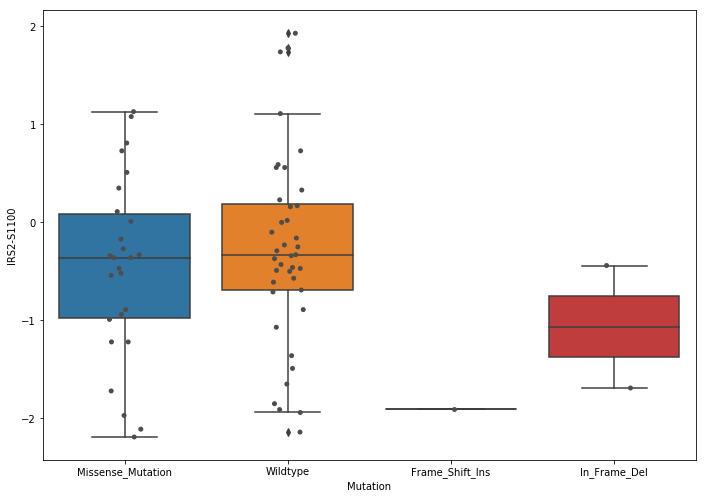

In [64]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'IRS2-S1100')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'IRS2-S1100', jitter = True, color = '.3')
plt.show()

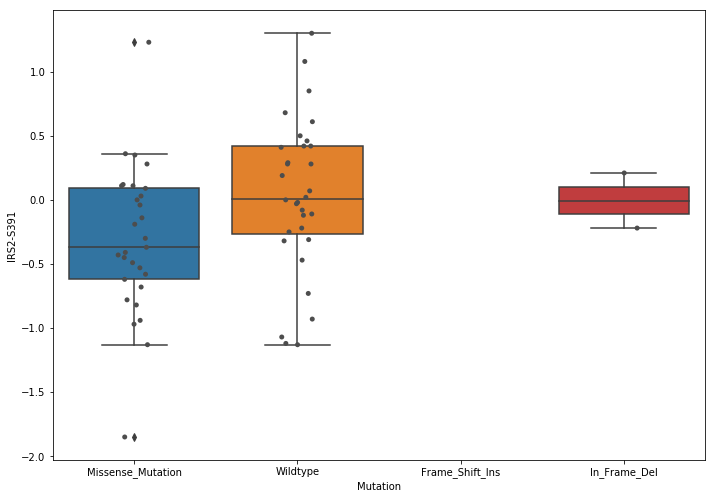

In [65]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'IRS2-S391')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'IRS2-S391', jitter = True, color = '.3')
plt.show()

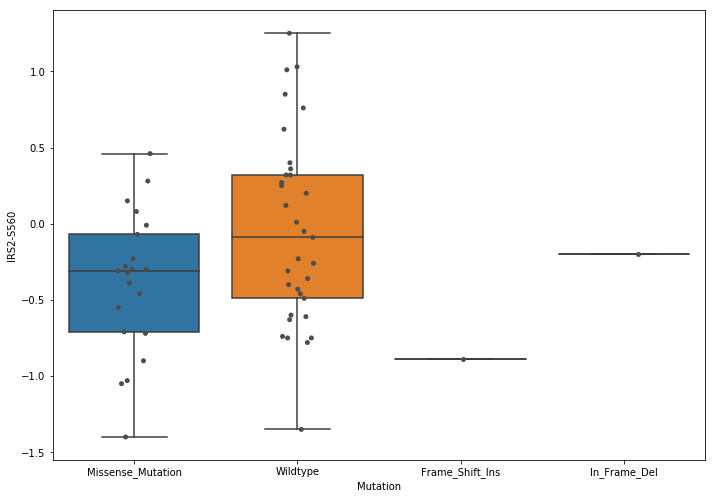

In [66]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'IRS2-S560')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'IRS2-S560', jitter = True, color = '.3')
plt.show()

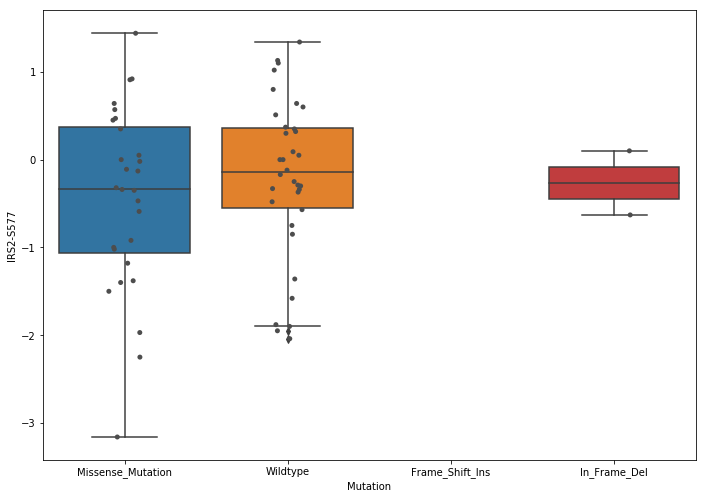

In [67]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'IRS2-S577')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'IRS2-S577', jitter = True, color = '.3')
plt.show()

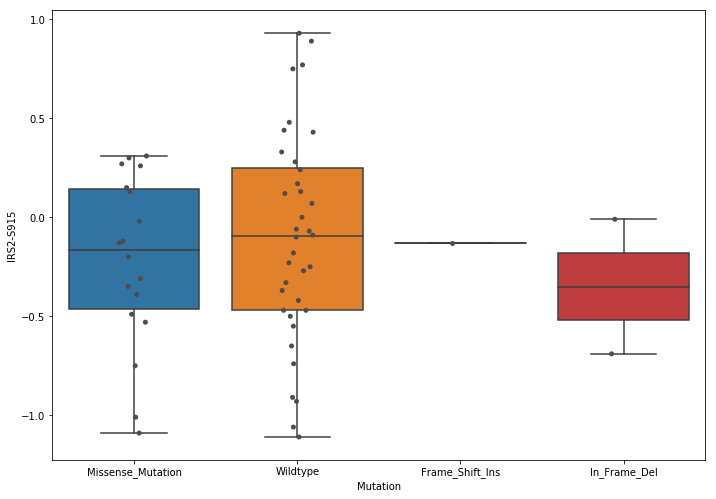

In [68]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'IRS2-S915')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'IRS2-S915', jitter = True, color = '.3')
plt.show()

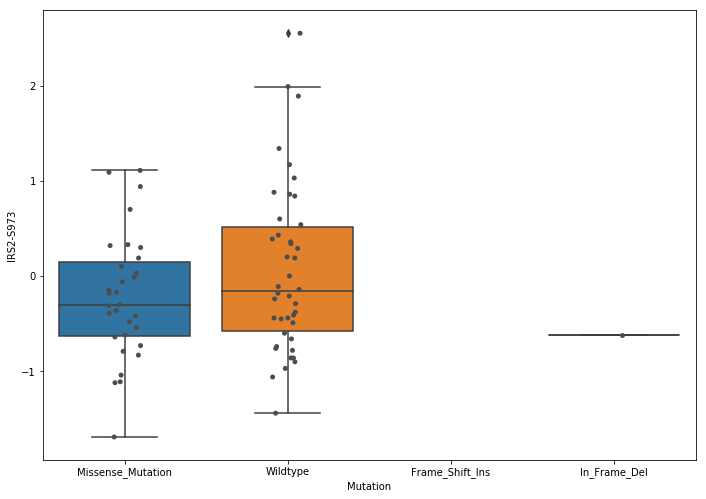

In [69]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'IRS2-S973')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'IRS2-S973', jitter = True, color = '.3')
plt.show()

## Plot all of the phosphoproteomic measurements

In [70]:
protein = 'IRS2'
gene = 'PIK3CA'
phosdf = CPTAC.compare_mutations(phos, protein, gene)
#print(phosdf)
phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis=1)

In [71]:
phosdf.loc[(phosdf['Mutation'] == "Wildtype"), "Mutation"] = "Control"
phosdf.loc[(phosdf['Mutation'] != "Control"), "Mutation"] = "Mutated"

phosdf = pd.melt(phosdf, id_vars=['Mutation'], var_name='Type', value_name='Reading')
phosdf = phosdf.loc[(phosdf["Mutation"] == "Control") | (phosdf["Mutation"] == "Mutated")]
phosdf = phosdf.dropna(axis=0).sort_values(by=['Mutation'], ascending=False)
#phosdf = phosdf.loc[(phosdf['Type'] == significant_sites)]
plotdf = None
print(phosdf)

#print(phosdf['Reading'])


    Mutation        Type  Reading
0    Mutated  IRS2-S1100    -0.94
665  Mutated   IRS2-S620     0.00
663  Mutated   IRS2-S620    -1.48
660  Mutated   IRS2-S620    -0.29
652  Mutated   IRS2-S620    -1.17
631  Mutated   IRS2-S620    -0.39
630  Mutated   IRS2-S620    -0.20
622  Mutated   IRS2-S620    -0.57
616  Mutated   IRS2-S620    -0.23
612  Mutated   IRS2-S620     1.34
610  Mutated   IRS2-S620    -0.81
600  Mutated   IRS2-S620    -2.41
599  Mutated   IRS2-S577    -0.32
595  Mutated   IRS2-S577    -1.97
592  Mutated   IRS2-S577    -0.35
591  Mutated   IRS2-S577    -0.13
586  Mutated   IRS2-S577     0.00
585  Mutated   IRS2-S577    -2.25
581  Mutated   IRS2-S577    -1.38
574  Mutated   IRS2-S577    -1.50
571  Mutated   IRS2-S577    -0.63
564  Mutated   IRS2-S577     1.44
563  Mutated   IRS2-S577    -1.40
562  Mutated   IRS2-S577     0.10
561  Mutated   IRS2-S577     0.47
560  Mutated   IRS2-S577    -0.59
558  Mutated   IRS2-S577    -1.00
557  Mutated   IRS2-S577    -0.34
541  Mutated  

In [73]:

for site in significant_sites:
    tempdf = phosdf.loc[(phosdf['Type'] == site)]
    #print(tempdf)
    if plotdf is None:
        plotdf = tempdf
    else:
        plotdf = plotdf.append(tempdf)
print(plotdf)

     Mutation        Type  Reading
0     Mutated  IRS2-S1100    -0.94
64    Mutated  IRS2-S1100     0.51
63    Mutated  IRS2-S1100    -1.72
62    Mutated  IRS2-S1100    -1.69
61    Mutated  IRS2-S1100    -0.27
60    Mutated  IRS2-S1100    -1.22
57    Mutated  IRS2-S1100     0.11
52    Mutated  IRS2-S1100    -0.47
50    Mutated  IRS2-S1100    -1.90
65    Mutated  IRS2-S1100    -0.34
67    Mutated  IRS2-S1100    -2.19
85    Mutated  IRS2-S1100    -1.97
93    Mutated  IRS2-S1100     1.13
83    Mutated  IRS2-S1100    -1.22
94    Mutated  IRS2-S1100     0.81
95    Mutated  IRS2-S1100    -2.11
71    Mutated  IRS2-S1100    -0.44
38    Mutated  IRS2-S1100    -0.36
86    Mutated  IRS2-S1100    -0.17
36    Mutated  IRS2-S1100     0.35
26    Mutated  IRS2-S1100     1.08
25    Mutated  IRS2-S1100    -0.54
22    Mutated  IRS2-S1100     0.01
21    Mutated  IRS2-S1100    -0.89
20    Mutated  IRS2-S1100    -0.52
19    Mutated  IRS2-S1100    -0.36
16    Mutated  IRS2-S1100    -0.33
7     Mutated  IRS2-

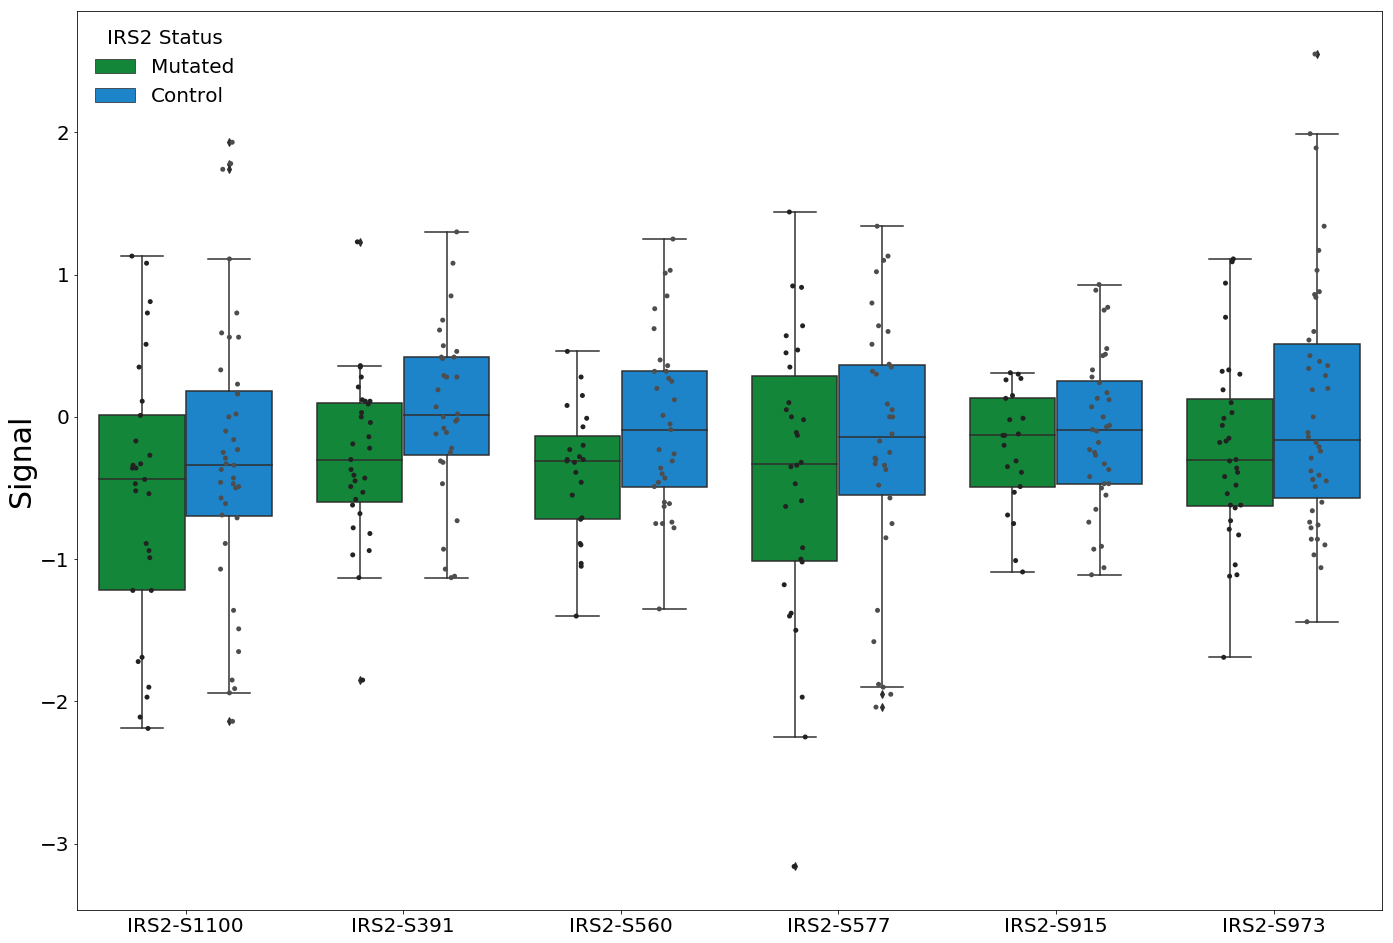

In [74]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Mutated": "#009933", "Control": "#008ae6"}

#Create the plot
boxplt = sns.boxplot(x='Type', y='Reading', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Type', y='Reading', hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Signal', fontsize='30')
boxplt.tick_params(labelsize='20')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['Mutated', 'Control'], title='IRS2 Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
#boxplt.get_legend().set_bbox_to_anchor((1, 1, 0, 0))


fig = boxplt.get_figure()
plt.show()